In [4]:
from brian import *

taum = 20 * ms          # membrane time constant
taue = 5 * ms          # excitatory synaptic time constant
taui = 10 * ms          # inhibitory synaptic time constant
Vt = -50 * mV          # spike threshold
Vr = -60 * mV          # reset value
El = -49 * mV          # resting potential
we = (60 * 0.27 / 10) * mV # excitatory synaptic weight
wi = (20 * 4.5 / 10) * mV # inhibitory synaptic weight

clear(True, True) 
reinit()# To reinit BRIAN clocks and remove all old BRIAN objects from namespace,
# it's usually a good idea to put this at the beginning of a script

eqs = Equations('''
        dV/dt  = (ge-gi-(V-El))/taum : volt
        dge/dt = -ge/taue            : volt
        dgi/dt = -gi/taui            : volt
        ''')

In [5]:
G = NeuronGroup(4000, model=eqs, threshold=Vt, reset=Vr)

Ge = G.subgroup(3200) # Excitatory neurons
Gi = G.subgroup(800)  # Inhibitory neurons

Ce = Connection(Ge, G, 'ge', sparseness=0.02, weight=we)
Ci = Connection(Gi, G, 'gi', sparseness=0.02, weight=wi)


In [6]:
M = SpikeMonitor(G)
MV = StateMonitor(G, 'V', record=0)
Mge = StateMonitor(G, 'ge', record=0)
Mgi = StateMonitor(G, 'gi', record=0)

In [7]:
G.V = Vr + (Vt - Vr) * rand(len(G))
run(500 * ms)

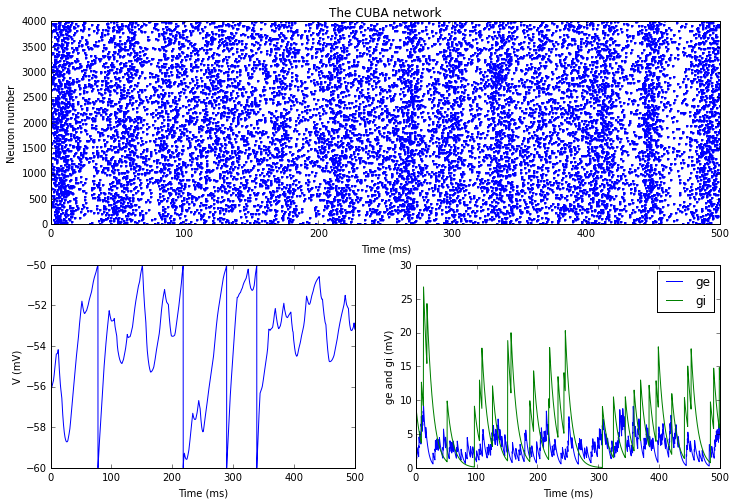

In [9]:
subplot(211)
raster_plot(M, title='The CUBA network', newfigure=False)
subplot(223)
plot(MV.times / ms, MV[0] / mV)
xlabel('Time (ms)')
ylabel('V (mV)')
subplot(224)
plot(Mge.times / ms, Mge[0] / mV)
plot(Mgi.times / ms, Mgi[0] / mV)
xlabel('Time (ms)')
ylabel('ge and gi (mV)')
legend(('ge', 'gi'), 'upper right')
show()